# COVID-19 social distancing model

Source: [Agents.jl model zoo](https://juliadynamics.github.io/AgentsExampleZoo.jl/dev/examples/social_distancing/)

In [1]:
using Agents
using Random


Update message: Agents v5
Welcome to this new major version of Agents.jl!
Noteworthy changes:

* Schedulers have been reworked to be more performant and allocate
  less. This means that most scheduler names have been deprecated from
  functions to types, such as `by_type` -> `ByType`. See changelog for
  full list!
* See the CHANGELOG.md or online docs for more!


Let us first create a simple model where balls move around in a continuous space. We need to create agents that comply with `ContinuousSpace`, i.e. they have a pos and vel fields, both of which are tuples of float numbers.

In [2]:
mutable struct Agent <: AbstractAgent
    id::Int                 # Mandatory Agent identifier
    pos::NTuple{2,Float64}  # Position, required for agents in the ContinuousSpace
    vel::NTuple{2,Float64}  # Moving speeds
    mass::Float64           # Can move or not
end

In [3]:
function ball_model(; speed = 0.002)
    space2d = ContinuousSpace((1, 1), 0.02)
    model = ABM(Agent, space2d, properties = Dict(:dt => 1.0), rng = MersenneTwister(42))

    # Add agents to the model
    for ind in 1:500
        pos = Tuple(rand(model.rng, 2))
        vel = sincos(2π * rand(model.rng)) .* speed
        mass = 1.0
        add_agent!(pos, model, vel, mass)
    end
    return model
end

model = ball_model()

AgentBasedModel with 500 agents of type Agent
 space: periodic continuous space with 50×50 divisions
 scheduler: fastest
 properties: dt

In [4]:
# Agents.move_agent!()
agent_step!(agent, model) = move_agent!(agent, model, model.dt)

agent_step! (generic function with 1 method)

In [5]:
using InteractiveDynamics
using CairoMakie

abmvideo(
    "socialdist1.mp4",
    model,
    agent_step!;
    title = "Ball Model",
    frames = 50,
    spf = 2,
    framerate = 25,
)

using Base64

function display_mp4(filename)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",
        Base64.base64encode(open(read, filename)),"""" type="video/mp4"></video>"""))
end

display_mp4("socialdist1.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAF+aRtZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOSBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAHPqZYiEADv//veIHzLLZ8na13IR560urR9Q7kZxXqS9/iAAAAMAAAMAAhx4LlTBrPXgzxAGQkNVzqxqzCdxzJUqpyb8X5XBp1MnTws9DnaLQbfXIDCWf6kAXhyXEryK6GFa5HSz/pRT1AYJwAt7MqFtbTGJOgmV566hkhmrP9DtxVXbyF/Jjrl3OjDriwXG0gPCTEmPjKA8g8INyzeoztId9yctqhK1H95ULGQVowYGuTtxOZECg4xY4FhpNXs9rou8L1SYrh5ImT0DLT7BxD7bFhgrsEjYLAr5MJ/hB3wS9sRj0nyuP86YIkhP8DZ2IGQ8brK+HZ8Hjww87DotThOn/5wb3HTP6m5t0EzfqlUkiyi4Vi6ivo+jFpFsqPDI6Mi0YJyTszzW95HQxkgB2n+B2ZYZARUsQiP9IyLA6g2taIn8H1PUqZzxB5z8mgAuLh/yrX+gQs14ZjBFzSzarP3lwiOrjKIa77AjwIf+M+aJ0IK6Xu+K6KrYiMBwpzrKU0dHndpJ2Z0DvzgJE3iPNgjfj5JOZpp30HQWn0vjyXTT2Jb0iVFD9kQ11yBjrSRXFTEZP/BJUjlatP+R1nonRuAtAwTuzR8zBf5OZ27JeIizL1MGUiLKgTSDSIvwF6n0fqca3AO1Zx+z7/rjY/7cVo/kwnYhg/giAJ+fYJd7O+QBqJiOkp6gbHYZtcxvXa5gAC1hjzB4NIqN+M1Ej8+pDOcKpistD4ap1vsNHIUU/dqzvmY9E72WMQnkomzo6jbcMbayiPZ4Rzh4Bzv3SQEe2bQ3JXCkouzXKEbsVXLYxK0r4LrL9VCiMuqW4Y/eXjzc3Tk03grH9RlpvmqJ0XoJL8UFGAGDa9kZ8WdjUYx0KV/M+F6dRZZcsn/eWMMfzxeufiMCeYEiP9oKo6/wIVgY0SRLrvYKWWf2hiJt5WFn2LAjovmsSuTDFRIHP7fzWxLjoUMs4paS365V78o4qXo09+iDRaS2gtSt5QGnd3xrlPpu4S8rnUJcmjmJL36raGCJ7oDVWU4fb48mEYGboW5foq45HQG2Uhy7LbSk/T9eG3Ka5hsnqMAizqXtuS8Omz3fJ9urrNXJbjQk23ToqROhO4wPsrQlQHFkA2UogmtRceuVS73D1kiRQ2cqWmaVBLQXnyZtNk+odyIVHQI3t8TXB0WnIQPP/Rbg4HWt5uhQsU8CO8U90lK5dZy/9BSLGE1qFEyEwPpjgw/YlKj0hqrTH89D/KMiG2SDh3C7alwD94b+KYM3UPN617j2H3uFyldTFiQddFh52iX4S2iXaW5pXBQfIphH/EroKd3vMBj9BJJz4WMT1XyJ6drTaIFwUdWPtj7X3fOXSK9gGas1f+GA6XTmBztlh43fgHsc6YZgo7cWoUkW1k66+K9TxA7i1x7UtUMKxogugrQPlwgtRCjBdoBS3QlU9GsABqc4l8KkQ78SGb7KEyuIYufAavTedwAAGyvT4FkUISemy8jvS22ijyr8MhND7Ymq7IzD8JOJfzJzEafYIbUXNpqlRu0qJMpOt8jhwcosu01QV+hMRISdnyHdyx5anj3MkDLlaEp6m0LKFTsTstrptz/89jK0VkS83qx9MbDet9Vzu6EKiDYMBC2vK6uH83FMnL5nkdf/XPUvxfs2QRPm/PTxilj6IAvik//kcWrcjn5RVfoeYYRNj/ptPCuzSDTXUz+dty/jY8UIMfpNo9hooDwbEHdkz0g+GpSxUXEc4fXcSaeHabsS8qUOCcoMP0//kQKchvauSnDEAkC5e8iX0BfydSgpQcQCPGuxJMmix0hdWs0i/l9GniXaA6OYq8b9v5RhfzPmTTR3GZ0ZeP5h2x/yQJepY7Q05fIUfAKyDwnTDAUiUSi6ReLlPsVkzkTqPq5G5xjuF0IB7nTENTxy6456i8eQ5GziUmlMTn8Lp+cPSnIiVrQU00NABVZQuca4OkPRmFTiULqDjrd6vQO6QLR2j0XOADIEFKGo9oRwxbJC/Y2Ry7Edx0YXKLg/g/G37/S9psH9BB3jKYtWgji6c4p66DRn0OjLwnCsMuvVahel7P5UDBm4Hb3o36swcgaI1NFzkXiIRXols8d9vMvhOn9fZRB20lfBDjYuyyCNTY7TekDasCEJcEAZMDFLoihx/G9Jyrf3c2tUDpjs8BYlQBC90ueXRBzC77pIbmXr5yAg/8MmXKB7j2h2inwh0DmlPqhzHbrug37VsrS/NnjUcrZjQeKqDzh1v6QGVZZE3ddD//a4sv1VRAEaBY7bSN6vflV7esfnS+2MbMrTbbfN2q+Eqs6ir4bJ0380aNojyCsVhkD4umaQZWaOtbeEr9PjdKJLtoj9bKuXaooBqoYra64pMpF15+Rk3k83MKnCPK9yOw39fkmyLp6sxW4qX67q5KlfdsuRHyeOBddUxzZ0kM+VHZiCrNCdf0QHjoZmAMiiqyW969HVzVRBOyQAmNU4bptuMptIUmEsR2hcPK/6u8oSLnIo6xBETbPDjOEdX2ziCZVuegMF3IMfLCG31t60OiCVZ57UWTux7r9JogcdHc+P3asE3rt9TvEd0lYPXblbXKo0mCdkjVQIvlSVnS6rGO0WIVWBFWv4HCUaDYtn62ivzQ6f7VUWQCGdPxeWxUjXikgtIE8osOHspEzIckC5t5tpawDo5DxyiheCRlxR3FSMakwfiKq76gys5ZdYmTYsx7Pk38Ej076ARHsVs5KtCdIr6ON3D2Vi1Cyqm2KrxtBDLbSiSfQcGAA2S0krZ1ewrhBMFzTWy3OycTFH3LMUgakV/mVWQezy8Co4WFZrlDos8v2WRHIz1E6aq6NqxJSh8yGBX+JcJdPMV//sLJXOrH8UtWFlncRJPCIXFHkuqgEbGFN958k54sgHeCbFVvCB7l38gf14+JH6FQNAyvrr3qcAOpu2l13OcYyz/PEr3XauxBchSc07zcIhZ5PcvoJSG/OhiFF0r7K2IFK6T7MlaXBD4kzYQzvplweAlJ1

As you can see the agents move in a straight line in a periodic space without interactions. Let's change that.

## Billiard-like interaction

Using the continuous space API:

- `interacting_pairs()`
- `elastic_collision!()`

And we redefine the stepping function:

In [6]:
function model_step!(model)
    for (a1, a2) in interacting_pairs(model, 0.012, :nearest)
        elastic_collision!(a1, a2, :mass)
    end
end

model_step! (generic function with 1 method)

In [7]:
model2 = ball_model()

abmvideo(
    "socialdist2.mp4",
    model2,
    agent_step!,
    model_step!;
    title = "Billiard-like",
    frames = 50,
    spf = 2,
    framerate = 25,
)

display_mp4("socialdist2.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAGIzRtZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOSBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAHUIZYiEADv//veIHzLLZ8na13IR560urR9Q7kZxXqS9/iAAAAMAAAMAAhx4LlTHwtQQw3AAZaQ1XOrGrMJ3HMlSqht2g31wQ81ZeDoU/1BFS1dIswUN8fQXoMiheZTLQySKbg4jhbGo/sFQXILbn06s8n0pdKBW8TD72c+pnh1zM74N2/iXxtjKMLh1y3ruuiJ91C0SC2uPIRLDPJ6NBXYFfeCU0IH5+XmSB241oYr3SUbaJntqWvLXcy3Xpjj6fY191nFApUPwMg+nCyIvJIK+Pr2vO8AiZO/EuZtmao84H+w3+veSUv1JKvCPvp0lO6H3Av6MHtcDBgLX0XAEWSLtqgL6fO5G496TSfMx2zYSU9n9Qlr2DSRbbv3v0g6b5NMDvPhQLDcOHlzx5gRe9p+/WtVLI+tGPbIN6XVJpwYwfvxFIfRa3xOZSNVac/xObozizAPIdQklclue1zRun9+303mPcXepHN/V5I0ekly4yQfm1tMpeuv+1Y0FbPjxtaWwOLYlorHrYL8k2Y1g9lac16Y8PM2ZvfZJ2so2fMHV/NF783nXOaJRcwNENbqlGrgoYzFleZPZItBf39jCgjleJfUjj8pncwNstv1q/j5FxaRNEFcwKOnwbjcJNLSH1mqzTQ0RMq0i3T+W3u0nknLxVQzyiT0ez/ww5rYmXHqpphCOFQywFNMX2Q66uCbVYdwNSjG0ef63DmJYSW8vOChBMGgMw2kU3Pt5PmKQyH6fQQWOVGV51xa8PrZWIHVPIP3/xj/9wS3iPvwZ5cUHN34vKF0pVh8yEyDpBZ3FAENn5c2PEHbMwKuiIIjgDGsFUGvNpVWiXdz0hiGtuTrEPX7UgXmmeLNfYejVweoRdOrR/NXldQggRyinJonWB2tY8kb64Z/wdTQc5U/QuJ/NiY/+B87iSImM2O4IT65yU6WozQgSqxlBgypQL/bHhZY+AkuaZ5XXXWhA+m6UHqDUaD/dv3X3QuE6aCWjcvb5VInU3tD0BqJTTPrCqeKlnmyVIOoqZXGQdGjHy8GVNKnQrti2sqIB90bhEZKt13WUyJeXrReir/a7QkCD5hBi/w2nkzYlS3Asbv3yCHz2IsvI2ja4Po9HD6xBklB3aLCAeMi/lLXW/jdhv83qE1PZb2u36CMpm4bAhhFzCYbFHCO86PtnZXdrR69O1c8SQhZa7H4SWiohdhv2GA5/3ILBBlE3P/cRizaqLtEB4gy1GALjOI0JLEfGZNMjSQwYGGAh+umDiR6WGAj/ITCLpzVWxZM0+BzaLfH5zxjTy/FQsPZRa27TqC2bOq3N4z7vlV2estxnsVdoOki+b6kIf1daqU11Ni7FDce9k1m5Y+NrJ/jhbkVWeDHu4XjWnqTk23dpG/lj+5ahgPYvRH+VpNhp1oNK60cCF1MaD8ljYmpdKIl6imOgBGS5SNG0CKrCPBa827dUdX2VhcjzQID4HpwKWwnunbcn/hBnZIzIrDLBionEC5TP//9ZJ5peknxJEPgxGQMW3/zAk4pkhXhyWMzcxQYn30A5BsIwyZ+gAFyVBoyjJOHdEPoQyLwjc8iOmzeyvGBruxC3TTtSU2ASfgrYCKLDzFz31264xJhdJ/ip+gyxrNAnxPqTjwHes6D8K/YK0XYAdA8WYHSGCQynmScHWYk/xKZFyV+RDNbCuI2eN9bglMumZVEY7tBQDdv5crHpB1EDsI9UvQdtlsUDl4glLn0PVr77Ir/esaV45XT/+JB0X6o3bDiSbQ5qf10NE2fmkDqBB1AGlK877WlM2dgeNdPfi5qXB/sp1k0YmPRp/bESfwiE6aoiTuZM45dILs2IqwD0plmXKRzHsytnyfXk71KgftNdfi/gs3sIUnjT0Exvhy/PmT6V9F8FHLv+VvMqBBMYPiz/w6Qq5/TDn7Fbv9B7Grwn3o6PnMCiLmi8oBne22hC7inZNqKSggWxFyaqWkyaVXjLglC3tFAY8aWyg7N21AA0T1sMfrBy2prtJ6HTqfmz/scW6l2zLCY1kvEQtJnAxJUnZPySngZd9ulaSAJeNH2jPgcTFJKv+ySkOj3McYU83zBeVsQ/UvaHgTi6xW3TcUWsVkd54+FDFP+ya2eOGjB5mG4PG5T7v22zLx1UEUslRSh9CwXMZmLbiwN/m3uGtQ72mKlNPs0VGJ2n4siy48V7TnMk6D4g+mFRsKKQZmX7D0IjCa9T3Q9dmr4eRwfHXTFqwHDNRKtBTE+gijmg28mM/ijFrFVe4X/7ykq2r90enFRySBV8Yqu0e/Oo3fheV/i+zdbP/NsC+YwBu2OfnS/O45b9uF3nMFUfvzHq9Sis/GcFp3vaxeEW+ZK9J3cxJEtrptud+wgTP3Zg0bgNQXM5uJxW2EJY3BrA5y6RUW6qfDBY5DguNYj/9khbuizKAOAd3R+GlQjctlrNDl3CQuWaTI1wFhSFU8Qslk+yrdJs7KDwQeK5W/Y+xZ3Qv0dJvvL7w+S1xI5alnZLpsYpe4kuskmLbJRnghTK0EG4pA91Qym+L6KtlrywXPk/jzma+S4FFVmk0x+XKhyNBwTnfg4F8u56oa3a9bhtMEfPqQ244q/wcbnNE4GgdqaZTiC3zx3dxfx6z3katI/juypmFfUka5vod0SmSxvK1dbJdNWcT0UOHY6LRKHCRSHWrRO1wubCBdGBDmcMDOxGPCuTZJKCeVf732LyZQ+MmSkYff2Kmsji24VgX3FYTYIJngfa3uDbpEJnY4OoJeAld1PzCr+W15rz07PtkeXI4pFuN6kIDTJTggURIhDLCba0n+ktX/dTcEG2AH914JvwqAwbddXImKW4pzTfvvm5Eq6YIuSJTv1YZw/eof7htA5Nptacj1tbGxOjuHaZ70U+xVti/tF3x3zQ3G6znhaxFMOhX5HO9X8zZHtrJun6px1oIuxO7yot6rc6Gc7JTTGP8R38He5MZMspJCD93aEse18hzNpoO63bb5OrHrHfMWYDzRPb1L3vLiR

## Immovable agents

For the following social distancing example, it will become crucial that some agents don't move, and can't be moved (i.e. they stay "isolated"). This is very easy to do with the elastic_collision! function, we only have to make some agents have infinite mass.

In [8]:
model3 = ball_model()

for id in 1:400
    agent = model3[id]
    agent.mass = Inf
    agent.vel = (0.0, 0.0)
end

abmvideo(
    "socialdist3.mp4",
    model3,
    agent_step!,
    model_step!;
    title = "Billiard-like with stationary agents",
    frames = 50,
    spf = 2,
    framerate = 25,
)

display_mp4("socialdist3.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQACKD5tZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOSBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAKOFZYiEADv//veIHzLLZ8na13IR560urR9Q7kZyJyMs2eUwAAADAAADAACChVnGs7QVBDDCADeMNOEqv4FGsJzfE5jgcdWFLi4xBkojanDUEVLV0izBQ3x9BegyKF5lMtDJIpuDiOFsaj+wVBcgtufTqzyfSl0oFbxMPvZz6meHXMzvg3b+JfG2MowuHXLeu66In3ULRILa48hEsM8no0FdgV94JTQgfn5eZIHbjWhivdJRtome2pa8tdzLdemOPp9jX3WcUClQ/AyD6cLIi8kgr4+va87wCJk78S5m2ZqjzfnKb/7R8k7ezecGIxX7C3rjttD6K9qhyamWTEZ2gaKwuwLcs6GKaPB/rxJ8zHbNhJT2f1C08bWki23fvfpB07SaYHefCgWG4cPLojzAi97T9+taqWR9aMlZMb0uqTTgxg/fk6Q+i1vicykaq5Z/ic3RnFmAeQ6i5K5Lc9rmjdP79vpfMe4u9SOb+ryRo85Llxkg/NraZS9df9qy3uZL5rTVpSaKR8gmTcdrTa5NjiPlac16Y8PM2ZvfZJ2soGjMHV/NF783nXOaKhcwNENbqlGrgoYzJQfJewb/x4Azs46HK8S+pHH5TO5gbZmfrV/HyLi0iZ+g5gUdPg3G4SaXsPrNVmmhoiZVpJOn8tvdpPJOXj6hnlEno9n/iBzWxMuPVXTCEcKhlgKaYvsh11sE2qw7galGNo8/1uHMSfcfKU0hRsBr8ZsSEPOvX/Z2Rf8hCOn8+mt80dHCK4Ux7sQOqeQfv/jH/7glvEffgzy5YObvxeULpSrD5kJpHSCzuKAIbPy6UeIO2ZgVdEQRHAGNZL/sLSm2j/2HfYpA3NtydYh6/akC80/xZr7D0auD1CLp1bB7Qqi2n1OUmC4OrgkO1rHkjfXDP+DqaKYgRu47Rk2Jj/4JzuJIiYzY7ghXrnJTpajNCBKrGUEDKlAv9seFlj4AV55PeKcRgJ/HdY/POj9qZemHrgvF/26SX85O7W+bODj1wykK8tMbZcTvaRbUXPYD87zS7rI81Rm56Cv5Nwg5AKUi5G/E1+hzzfWdaIz25++KHuu8XlT+E4WPvkL6693tDqd5YrVvxoJvNfRfgDvLc5ITnb4ka4Cuq5e1E2W16uuvtLE6/jtRP+PvmE9Rp4dm1Q49weh8zEhIFLa0XZDhDowxwvU2WGSuPtaYFRHnidlhBgqVlANoNvSa1W08j4gdJIOTF0OPJYAIUAJsfRtBRbV8ee4HlkbYNS204QXt2dmtnlcmPOa4fyyREeB7htIRpPmNevd2ucKjeZreQ5mV0psVGTWQ6LZrgn1VEn0AzAXkV0HxQ2NQSBRdS9p0oOCQKCOdzo+ZvyybUzyCW8DUK4CsisyXGhpk1QH10ODn1OO0o5le+fBQy3bv4qgJxS1FqMeWTwLqShQaRChZip+MhHPEcQzT0nak2vXenrBmu2axXv8pj/U+kZb4tX6K7IGt+th2t32zbUNr4DWzNAzliRcf4+3bQ6kuyNEk/kDF6kWgxY0jjshNOTuaplCm1HW0wxBU83z/fteB088SBs5One6FDF3a2xDII7oynEym/AdW77DafOnrw/uBrthFvTO+Tge5/7YNRI4AiZE+EmKRwkOzXF5Ru0206wYpEPxvHpoUz3I6iQBJioO951DleZUoc3QTvO5Rxyu4BurWpR9GI6ssdWHdrX7OTz+1eS4jm6nXBSR4Ip3G5ewqDz6Zqu0F6nWSe/QtSs2kKuKCB12YB8x6A6TCzw09+YpsYU17yJP/S0A+57BiftJBBdYcLwQYpBCr2ntDX4ulI+EfZ9AaEatymVgwZAZTJ3CatuakDDYONCwvqrtScFzQeJe1Ngk3Fa1lUnnIKib9fvdYpleBdV0hPsa6PsRs0Gv9SnTZCYVDwtZHSk9mqml4fe3vy2hPDkGC5RReSjCykk5ntubtPcWv58Ju1k/M/L1LcOb+LIky5Q5fgn5Yn5h7zdznNRGz2Mn8G7S38N1rqpeLf55bPhLFIiRszvbyZta44CzdNUdK7x2rsOXyAu3INO/1tv0g0eBmca/xCRL0te5O4/7TaSJiNRKJm5msXp3QrIHqLzBP68aNEm8F7p5wdD+O1qRfNQFqvP61iEkCJft8nFnuR6roTdYurkU1jBJVhFiQgLjO1HH+2O8qyqRwoM9Kxu7H/10+kWOhFnTsJCNFIhnYbSnpKqgh8Zj1PYdtYW7Vbz/HxBlT/v3P7PppMh4ZEM6ciwcC62ftPbvlVYJ+hgHS40zkwSa/iTQNMHVOGdmk5SV8npPekC/UDMI+m4ScD8CR/LLyjCObB7Y9JsJ75YGEkpMJfh6vC9GlKoofCRfD0KzRwjsG+bBMIzF0nnKS3wMx9IxDKPdRXdBtXVgBh99Zve0aSwDa79Q3ZwStu3qeADB7pSgz/FYWXTv8ZMXBlli6QJ9jkIa4OrVHfI8b7wOKClqfD3pHYyFwY4x8H0VbdjcfYXNcSEV8EBz37MXdrYzRxJTove6sbELr6JkKK2sUAtB2GV3iFioXBGDC4glwSD/J/SbClqBT7fD5k3YzW1mZM4zst9/hv4eqX0bBQ8Daup8CCep/quGioVBnk8dEtVTSNquWJykRxAt8fRPhNQUtgvU1Mp4Xweuf9mkQKHsd2GKz3P/oSlA/XtP7cfyf+vqLTzlwcdjoFe84crqBOAEGj/21qOrS2PmrwtL9DWkhnSEtJck/D2XT+GbNpRQCdXOsUz5iBRkb4uy4jbbpinh8Kyn1ap5iV2aH23zPNdUsZyivH6u2VOqv7f8jD0iwE7IHRB8i6f053g3DoHuYsAPR8+a+WoiUPnzLk2/HNOZcY+DF4ePNO78ur7sZdWqnj1XYPfbFWAIq72GXyR6VS0zVWmhMT1LMB0DAvG8zR8foLs+q6Cvz/kK7mqgoJdLRxdwUuhZdnl9aP49ZARl3I57+22YmvrEwte4Ey3numQHES27uPYe7SiXIL1Y8IQ0JENWrvPh

<video controls height="480">
  <source src="_static/socialdist3.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>

## Adding Virus spread (SIR model)

The agents can be infected with a disease and transfer the disease to other agents around them.

In [9]:
mutable struct PoorSoul <: AbstractAgent
    id::Int
    pos::NTuple{2,Float64}
    vel::NTuple{2,Float64}
    mass::Float64
    days_infected::Int  # number of days since is infected
    status::Symbol  # :S, :I or :R
    β::Float64
end

 β is the transmission probability, which we choose to make an agent parameter instead of a model parameter. It reflects the level of hygiene of an individual. 

 And the model creation function becomes:

In [10]:
const steps_per_day = 24 # One tick per hour

function sir_initiation(;
    infection_period = 30 * steps_per_day,
    detection_time = 14 * steps_per_day,
    reinfection_probability = 0.05,
    isolated = 0.0, # in percentage
    interaction_radius = 0.012,
    dt = 1.0,
    speed = 0.002,
    death_rate = 0.044,
    N = 1000,
    initial_infected = 5,
    seed = 42,
    βmin = 0.4,
    βmax = 0.8,
)

    properties = (;
        infection_period,
        reinfection_probability,
        detection_time,
        death_rate,
        interaction_radius,
        dt,
    )
    space = ContinuousSpace((1,1), 0.02)
    model = ABM(PoorSoul, space, properties = Dict(pairs(properties)), rng = MersenneTwister(seed))

    # Add initial individual agents
    for ind in 1:N
        pos = Tuple(rand(model.rng, 2))
        status = ind ≤ N - initial_infected ? :S : :I
        isisolated = ind ≤ isolated * N
        mass = isisolated ? Inf : 1.0
        vel = isisolated ? (0.0, 0.0) : sincos(2π * rand(model.rng)) .* speed

        β = (βmax - βmin) * rand(model.rng) + βmin
        add_agent!(pos, model, vel, mass, 0, status, β)
    end

    return model
end

sir_initiation (generic function with 1 method)

To visualize this model, we will use black color for the susceptible, red for the infected infected and green for the recovered.

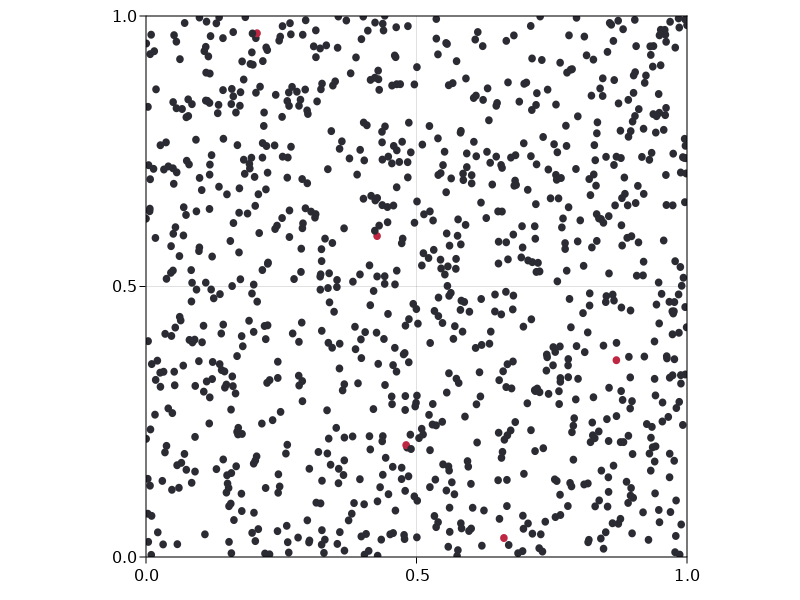

In [11]:
sir_model = sir_initiation()

sir_colors(a) = a.status == :S ? "#2b2b33" : a.status == :I ? "#bf2642" : "#338c54"

fig, abmstepper = abmplot(sir_model; ac = sir_colors)
fig # display figure

Modify the `model_step!` function to simulate transmission.

In [12]:
function transmit!(a1, a2, rp)

    # for transmission, only 1 can have the disease (otherwise nothing happens)
    count(a.status == :I for a in (a1, a2)) ≠ 1 && return
    infected, healthy = a1.status == :I ? (a1, a2) : (a2, a1)

    # Lucky and not infected
    rand(model.rng) > infected.β && return

    # Risk of reinfection
   if healthy.status == :R
        rand(model.rng) > rp && return
    end

    # You got virus
    healthy.status = :I
end

function sir_model_step!(model)
    r = model.interaction_radius
    for (a1, a2) in interacting_pairs(model, r, :all)
        transmit!(a1, a2, model.reinfection_probability)
        elastic_collision!(a1, a2, :mass)
    end
end

# Agent-specific functions
function update!(agent) 
    if agent.status == :I
        agent.days_infected += 1
    end
end

function recover_or_die!(agent, model)
    if agent.days_infected ≥ model.infection_period
        if rand(model.rng) ≤ model.death_rate
            kill_agent!(agent, model)
        else
            agent.status = :R
            agent.days_infected = 0
        end
    end
end

function sir_agent_step!(agent, model)
    move_agent!(agent, model, model.dt)
    update!(agent)
    recover_or_die!(agent, model)
end

sir_agent_step! (generic function with 1 method)

Running with default parameters.

In [13]:
sir_model = sir_initiation()

abmvideo(
    "socialdist4.mp4",
    sir_model,
    sir_agent_step!,
    sir_model_step!;
    title = "SIR model",
    frames = 200,
    ac = sir_colors,
    as = 10,
    spf = 2,
    framerate = 20,
)

display_mp4("socialdist4.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQA1W+9tZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOSBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAJ1aZYiEAD///vet34FNvxI9a7pXOLTLq5Q0PVH2lKZ4tkgAAAMAAAMAAFIXL0MWjt0JreeIAyEeqT3hBgSakytHPg2gWp6n3l5cU76CXOgAGY0eHOESt1f4QoK21y/lNV3w++H0wC15Vkw0jrDND5DBqZMmYt9lkbpr7oHWvfc6HaPY2/b+mqPX2luAmNmYpd9KuNtQTCfgBd1v0C9liJQZ11qX5mts/ztGMnkLeUVH/SLWyxOV7fbVhhXpnWsW4tPyW/AawGO610zckfviNgcloujN17cXhBm9ADv56bGvL94Esn4DvrXbPfMF0IhfWAHb5Ybal5ndN8A9wj951QpWr6qDcAkMEHqYGr8h6nDBsxOd9wY59t3yT2M6dTJKam53A+lNrA9pWHLDb3Yq5L+AXMVUbKP0PPvVQxIsN/jBgnlQqna1b11DwQsMUl4ol5aTU9IGdzr4Yov1HATPJAVBK7Che6r8/pcqZyjHO+iV8LmMO1K4iQuzy0IxrhXbVFtvGdfUFmJxOmrjouy+BPtQ+Ghj/qNaDEvVCxGidO/aKHCNbDjAJ1YhY21xCYl7QUjE9bv4QqDMF2XF1iTiuwJL2t5trsQ9Rd0hvFsA4vtGs3+Wr49MKQoITpDVdQA+Arpbhz23aozYclZ/56DtpUulIjijfo1GcHv1E7ANlhJhp7jpnW3jqpT1R6NTTVuUIOYTSFf4/n3XA4SsSwaSsIfvtwDIvEasOtfDM8xMor4ND7xvFcU9NJx623TjHz94TJMKahKRAJiWEtSTQi7oQ6/HwYIEEPhsiyGuo6uglDkwdNKjKB/nNVmwoHXNiXrBRULrjhHX6JeGgQprZnWD/UPnYqccfnr6ct8zSUApB1IYW3v06TKSXMPYEK8BQg3sn3AGBAq1eRLvbW9IM0nhn/QHkQmnJO8yL7ClztR0Rqf8ds1bC4daY6f+pMD+upx6vtMDm14jna8hvhjo0/9Pexey3cctp8scsc3lXuiZfApQ7DNxsqWKHH8nhnJPPJuflyCoxm5hw1wcxz9gM94Iw53Vm+5FPdyDU5aMjYuxp8iAT29ca7e3VXY88c04GpnAx9RjmJm/cQ2Szr0sETj7gEShy17IqQVRH7KGLBp5pNytTf4NukD/kAnxGQRJtAffNygsWGncGPdIPLWycNGo5u5Mtd9ZRdy7RHxJhR2TTUztIzdiQ8sbTqSPVLDTInIrS0WQ5nRcHdoZ19oaDks1Z0d8EzNtyDJfYlA1DeN265XEkPJ/5hRgLI6Zr/z6/oZaQsKPRO/7ibOtmaIyQpxd+DJOwG0o0trw9Zw7H2l+gs85Z8MrjI+ZufufC31JkNaf4VuaqY9GwXv+f6lLVDUxsZfKjlu6vulrke70ekHgyRILx/gB0deTYgENT7/l85tag5dvO3wYjSzuH6tl+yqTDwR8l7yTygAWuGxsGjn/8hfC7dnYV3uL+j11gAO2SDCCUh99cxYr3MLwwv5Vrr0Fv0vlTTGwAAIJViXTtpt8qwNx6FY/jn1RWzy/47ONGwPWmHzsTYFKlRc7uX0NGd7XQxi3bjXkQFytl49aChldyvw13BH0p668dkoVBnShRWQ1S4i1g2CB9oCy9ojnc96uffvoco8dN/OOj9NdoKWLY1g2WJHE1xnyBwVnVVVzarM/KcvWCfP9OBzjcpcQX2Vd2MU1VUXSRYcDwuKgkw5cX5GhN/Y9F6bNQHCJyhrY7vcgVPvYYzeE1PdTYZjDTxjEYu9XrS9B3zo9tQG8h9fNBSNGYhw9VH5ez7fAXjHweG72U9cOCr12wmb4ZVtrD/2cRKVz84vYsUBKgRgA3ndcDB6gNAT1ky+dLXJ3g+rMDSerfl1kLEL8PoUKjzykJTZ/r95MzNhxE5W/AGYSF7ZbEgxpE6FB1tEsY5MGN7llMPG14GnhGTq1K8JTHFyRq+Bzo5IcZ/HC6f6nRoWI5UZaIQd91RE64zjWhHeg+CNxcIO2uMqfDI51zqBuudQ5v8YlzDSIoe/2Q3HeMEG5v7X//QROwCUbaWCvjuFhMYyifC9AnZr3e6wOQ3PDNvHMLGe/Qtf+atoChJJH+vLJ8NbI4lbtEgxA/8NALhgXTUbUMbETCJruepZYSc6DQj+DEHiVsI2Vdn2Xx2fXURqDCnhX8ek+LSS1MT6Es9Xo2E/3Ce0yZ5G+/WyzFm2lktta8f8hsvtiOQXtCxc1bVA94kPSG2Tgw0M3OzJkOibpMr8sukTU/HvnpfAvs7D6+W0mEvcEMyW5hmI3E/JHu8mLBr6VWgMrdzlxfIvUObgs0Ud5MNyx7E7UEAGIzpBGIKTueI4YCamAN4fhD43oxS+f/J2YEyPRsyb0tdBTjcECu5TjcmtA3NoyLq1ZgOiYM33/SfoBcykWayp/u+rjIWl1LKUDMM7fNDNYe8flw/TBEH5ZmnpIXe9ldD2yxZKAdb44x+yAiK6OtsdjYcRFkGDMQJxOuKGiQqRfX1bAF5Dj2LmuYTAVf8DxHQ0WgxuO/6C3bilcCHGFxk+x3ZWdrfWxBLFXynQYm6+lMAY/gZOtIsxqDulEyNVM+75izHW4xXE4a/X74pejDT+VTijq3b02fs3gs7bIXIVH9HZ4Mb/zpK1+JB5Zr4GkH59GTsp8iWIbPubP15lrNidZGvPtNtxJyKWfHWoL88e8CFP2gsaH34/f08ZnYtMx01UFjTuVVSgBI1KQK8tV3JuBz7eMpa3f+q+DKqsX73N7Oc4wWQ4Y7R+Aew+VMn69EL8n7fH1+ZPSc9Wg+wTkz9b0Z97XVp02TpX10UUOQ/PFDAsRH/Aw9eOT9UIUC/ukiOXR0j63uSn6Q6FH9AHlcXrmd4rZ5BRUtZAR7nK53jdS8x0+S8EZI0ky3ipSHWu1/8FgjO1CloDwxOnyofsAx8N6BEW2cFqLqwUD7X4lzilJLR1k9wM0X7wCeaYm/Z+K/Q+3NfYdsYl/Nbmev8p4NDxV7ebF7h1eXBQNKF6VzzswCPv

## Analyzing exponential spread

In [14]:
infected(x) = count(i == :I for i in x)
recovered(x) = count(i == :R for i in x)
# Aggregated data for number of infected and recovered indivisuals
adata = [(:status, infected), (:status, recovered)]

2-element Vector{Tuple{Symbol, Function}}:
 (:status, infected)
 (:status, recovered)

In [15]:
# Try different parameters
r1, r2 = 0.02, 0.05
β1, β2 = 0.5, 0.1
sir_model1 = sir_initiation(reinfection_probability = r1, βmax = β1)
sir_model2 = sir_initiation(reinfection_probability = r2, βmax = β1)
sir_model3 = sir_initiation(reinfection_probability = r1, βmax = β2)

data1, _ = run!(sir_model1, sir_agent_step!, sir_model_step!, 3000; adata)
data2, _ = run!(sir_model2, sir_agent_step!, sir_model_step!, 3000; adata)
data3, _ = run!(sir_model3, sir_agent_step!, sir_model_step!, 3000; adata)

data1[(end-10):end, :]

11×3 DataFrame
 Row │ step   infected_status  recovered_status 
     │ Int64  Int64            Int64            
─────┼──────────────────────────────────────────
   1 │  2990               76               875
   2 │  2991               76               875
   3 │  2992               76               875
   4 │  2993               77               874
   5 │  2994               77               874
   6 │  2995               77               874
   7 │  2996               77               874
   8 │  2997               77               874
   9 │  2998               77               874
  10 │  2999               77               874
  11 │  3000               77               874

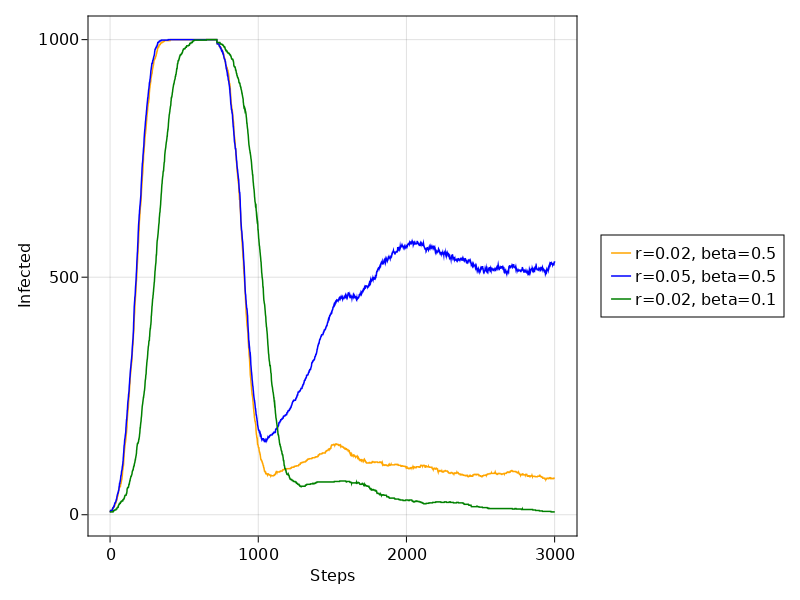

In [16]:
using CairoMakie

figure = Figure()
ax = figure[1, 1] = Axis(figure; ylabel = "Infected", xlabel="Steps")
l1 = lines!(ax, data1[:, dataname((:status, infected))], color = :orange)
l2 = lines!(ax, data2[:, dataname((:status, infected))], color = :blue)
l3 = lines!(ax, data3[:, dataname((:status, infected))], color = :green)
figure[1, 2] = Legend(figure, [l1, l2, l3], ["r=$r1, beta=$β1", "r=$r2, beta=$β1", "r=$r1, beta=$β2"])

figure

## Social distancing

The best way to model social distancing is to make some agents simply not move (which feels like it approximates reality better).

In [17]:
sir_model = sir_initiation(isolated = 0.85)
abmvideo(
    "socialdist5.mp4",
    sir_model,
    sir_agent_step!,
    sir_model_step!;
    title = "Social Distancing",
    frames = 200,
    spf = 2,
    ac = sir_colors,
    framerate = 20,
)

display_mp4("socialdist5.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAN0FRtZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOSBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAMpkZYiEADv//veIHzLLZ8na13IR560urR9Q7kZxXqS9/4U2AAADAAADAAD510vFMR2oFUDKAA5MIUSm8xhCmqUMZLhp01T1PvLzBXV0EudAAMxo8OcIPgGBQhQVtrl/KXlR1z8PpgFryE/Ez3wvwVdOH6OkuDjYmgNlm3SfyBvrBTN8fqaJfwylqfCtAXJ3b3Nq5I/XjDKRr+08LfivSjqAzXkZcvQJRlslDmahDxCdbZ1iyiIBB2E2/BYf5MexCtXyfO8PMgy7dSfcmtKV/nwphlOlP7v7BExyi4zzTjrZkGMvVMitlPi+jo+mlIVVorgaPm3lZM/OcmFCygGA/CyfcztY3KXFsfVAOKzLBB9w53cKnkHD2n8ODFRZoPMvp34FLj7gtuApdH1xERvDRSKIF9rRfAiSqw6riYsibGYtBviU+c3yRwhckwkI0IKJznab4VKL0Cn8C05otMVFri/NHZ0HOx3qcQehIHK7Kdnr4mkF56nlN3UE8UbslBMU7iGsaqiBfRgpAo44Zqd2cj5hhUjUyyQXrnYSBZYAhtDPM7HYCcYesOSoV9fTBGhDyXlQcyBG2gb58aPQ0zdylsppFR5nK/ZPOc0lffAhMLyjzNWsAA3HcFPwcgKJSqusJRCvPTwIpCm59PRLq7Q/IR0iNS1LmTwNiSRBdyGvF2KfA3NpAIhv7fZTpcPmYSol3gLwuusOubPKfgxx9DJvO4tBAA81I6tFaZSqctd4iwQlUNqWtcfFOB/hT0DXWQkN8tVP+i5bRKVy8t4N+HMjrkd+41izYe0SfNu2EsJiv08gaxCluYOFYumeWgKzD0M6aVaMzZfD0qVG0iOg8Bwy9M05+W8UfRNmCScaXG7Nf5pBZvKmJaQ2EoUtjZGCXXt/o3tAWp2LaP9o6RUKx4htcpq8EFiVNBEUOZdscAQCNfyPFm3IaXwpjWhjOgLG+VtzQbpOktoc8R6tMfvnWmbF5DHQi1YmaiUs+gxB19aq7RC8OLTOcdRkmwEsp9ag2CZc/savR4iBM0Tp20f4MawvHShNA3M5az7XDTkPNP2BNNmRAqFAW5ifsdH9AhH2DIrMaMdo/Jeu7dlo7Ok8002Ros1Gz0U+F7l2OVktaOrBeA6N+4Kw/SiwIBKS7WTmO6icZ1M+90usqyBAYv9Apds2SbM6oJZGxZ+Hq9Su21b0xSCBLDfPfcb4XqbkXIpjaDU+D/NnAri6OztEjhUVuwBFlbxXux+M/K9wY4KmTouSlD9LcIiqNXDbJ0DDNUdaPU8xlu+JFSzuEoBlURXo8en+wCpWg0oxfUrszCGhs/T71Iy3T8wphzIgxiF0DS0SeDBjCTu+nY+9Zhh3+GfdSQro2hxdmvcqq7+CEDqA30tWOMsLxV84ArFzQrzNqcDn/7Kz5R+n799P8XDMEqh1uW6SpLyoroPtfvnl276GwkmXyE/QAN+uNS+vtkfA9a4T4upPMSl4LkBc7xgeYrydMghpx5SmFrJjnaI2WXmpU+o3z73ImB1dp3my9o+yd3WVsZMeYcANVX63IdAg4ZabWoghcQN/LCXvGGuXEAJM2d8V/vLoFcoaHpBEhka5zSi0T9NbcZnLjijO++QBAVEeAeFRBSCDXZrXnGutbpo4Sv3a1KxZ8/PT1ZXGVCIZg7Gu6xdZJLIh4XELQLAmD2CYh0WbYtuexfZoK4F0eESchegW7juK4KoArtpJFBP7ldYF8i0r44Ds4QtpjaVqMCtB+QzFI0UMFpfFoynpcGM9oV7ZHAXHs+ZrSQGsm29dTQ/Tose9aZ/TRLEO/rB8Dqri//+gajn+0Y4rbAtTUMzbi83wuHZYzPRHP6DQJWQIweKVReM/fNeckAxQtb9jcA4RLi12fJI/g3HoBZKRywx5dkgxJ8DSxgX0I6AbXCL+e5DTBb5oWiS8Hcjad68kM3QaeQN+M7s/KGMQg5MRML0h4btRb6o/dEq/TPxRnAl2QQLU83WHnzk1T7CapLwuMS2Vdv/ypOb9z/Kc5eE4UZoE0c/0/wZoudtgk5c4eT7hV23KNYlHF97Avsmv2zsVIkEqZgDN8DlCAx9y+7RjL9IVa37mFsX+5XmsXYVeEdj/yvINEewh+o8JXOEQhSB0rGzse7xc/IzF8cYTMVVhj0w6srpPoYHVrTcaLA81X3qr26eKA4Og9ueg9M2kLVhKqegurhqhkEXRv+NcqFdqV4pjKUdQWa3kI/4RemlYliZx8PB7FUWS0Ine93sfSwdC+/AeOF2BWI4W5IDZf/x5h7TgC95Tp1CgLBUgNN5yO4SV0B2+M+0xiOsiTEEvMXIXEJsiDSR/s656Kc7uPGZyYdjtUKW8Mr/RbcLPIQBsUyUjXCP19fU9L1EYi2Ocr3nqZDghapiNAT/+r4Luw5KmyPTI4FX9W+rU2AYvgBROtXDDqUdZ81/BbVdOIC33gOIdse7BR0aIhHe4Nc9hvx6acnAfmktVam3aUrV6h7lJ6H5PcjI0UOi7NWOQdFUFCEQuWjmvBbmBaSuovgMzKr52Uoxc7JxpIYEHftrUms6ic1g5tqw16ZyVm6PK11BvbA79yTBwt0zEfbqN6WO5ohtLAk/Y347nUF5h0bmo294R4S9QDRgDit3wz7C49GSL1szmTYMwoy3S5t2KYu/IEKwgOB/gV/OYiH1qUnX+HH9dR0DzPdXs4ckMbJQecgMT1BkTF78kiNStfQLXZusVAgQ1R3JUrd93qyvgepxRFSqnDNrpLhJuPp7vPeb0ZoykWEX/nFBU0TJAP80C4owyBvJfNTOE9MO8ipbMjcUdVjqV9ACceUNziymOZAuJefMtoA/2Ka4NLLEyUa8c4Ec056mcUYqDGy7/0TIJ+97LpvctOejZ+SSB2Uj54GbGi0RctLs8vCtLKLKEpF3MyHyA41JVvq+9Vf8WvLQq4NE6tJCPQdFj5icbCPrAEKnDRnORvJvSa0FYeY3eTYOZNnMQtIcMHRJq4yi/aYko8eaVh0r

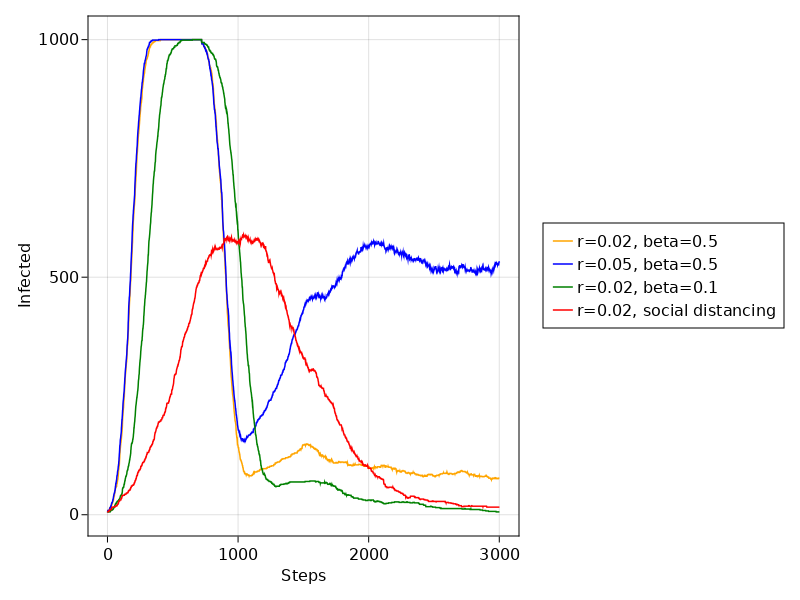

In [18]:
r4 = 0.02
sir_model4 = sir_initiation(reinfection_probability = r4, βmax = β1, isolated = 0.85)

data4, _ = run!(sir_model4, sir_agent_step!, sir_model_step!, 3000; adata)

l4 = lines!(ax, data4[:, dataname((:status, infected))], color = :red)
figure[1, 2] = Legend(
    figure,
    [l1, l2, l3, l4],
    ["r=$r1, beta=$β1", "r=$r2, beta=$β1", "r=$r1, beta=$β2", "r=$r4, social distancing"],
)
figure